In [1]:
import pandas as pd

In [2]:
resultados_exames = pd.read_csv('https://drive.google.com/uc?id=1UrR8mHCEQAWminQXxl60yhE9T6yNgrZY')
resultados_exames.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [3]:
resultados_exames.shape

(569, 35)

In [4]:
from sklearn.model_selection import train_test_split
from numpy import random

valores_exames = resultados_exames.drop(columns=['id', 'diagnostico'])
diagnostico = resultados_exames['diagnostico']
valores_exames_v1 = valores_exames.drop(columns="exame_33")

X_train, X_test, y_train, y_test = train_test_split(valores_exames_v1, 
                                                    diagnostico, 
                                                    test_size=0.3,
                                                    random_state = 1234)

In [5]:
from sklearn.ensemble import RandomForestClassifier

classificador = RandomForestClassifier()
classificador.fit(X_train, y_train)
print("Validation Accuracy - Random Forest Classifier: {:.2f}%".format(classificador.score(X_test, y_test)*100))

Validation Accuracy - Random Forest Classifier: 92.98%


# Baseline

In [6]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
print("Validation Accuracy - Dummy Classifier: {:.2f}%".format(dummy.score(X_test, y_test)*100))

Validation Accuracy - Dummy Classifier: 61.40%


## Construindo uma visualização

In [7]:
dados_plot = pd.concat([diagnostico, valores_exames_v1.iloc[:,0:10]], axis = 1)
dados_plot = pd.melt(dados_plot, id_vars="diagnostico",
                     var_name = "exames",
                     value_name = 'valores')
dados_plot.head()

,diagnostico,exames,valores
0,M,exame_1,17.99
1,M,exame_1,20.57
2,M,exame_1,19.69
3,M,exame_1,11.42
4,M,exame_1,20.29


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [9]:
padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2 = pd.DataFrame(data = valores_exames_v2,
                                 columns=valores_exames_v1.keys())

In [10]:
dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:,0:10]], axis = 1)
dados_plot = pd.melt(dados_plot, id_vars="diagnostico",
                     var_name = "exames",
                     value_name = 'valores')
dados_plot.head()

,diagnostico,exames,valores
0,M,exame_1,1.097064
1,M,exame_1,1.829821
2,M,exame_1,1.579888
3,M,exame_1,-0.768909
4,M,exame_1,1.750297


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

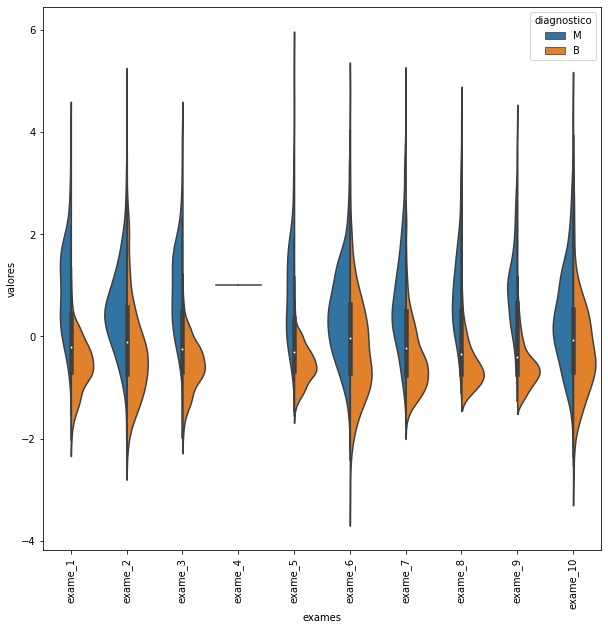

In [11]:
plt.figure(figsize=(10,10))
sns.violinplot(x = "exames", y="valores", hue = "diagnostico", data = dados_plot, split = 'True')
plt.xticks(rotation=90)

In [12]:
valores_exames_v1.exame_4

0      103.78
1      103.78
2      103.78
3      103.78
4      103.78
        ...  
564    103.78
565    103.78
566    103.78
567    103.78
568    103.78
Name: exame_4, Length: 569, dtype: float64

In [13]:
def grafico_violino(valores, inicio, fim):
  dados_plot = pd.concat([diagnostico, valores.iloc[:,inicio:fim]], axis = 1)
  dados_plot = pd.melt(dados_plot, id_vars="diagnostico",
                     var_name = "exames",
                     value_name = 'valores')
  plt.figure(figsize=(10,10))
  sns.violinplot(x = "exames", y="valores", hue = "diagnostico", data = dados_plot, split = 'True')
  plt.xticks(rotation=90)

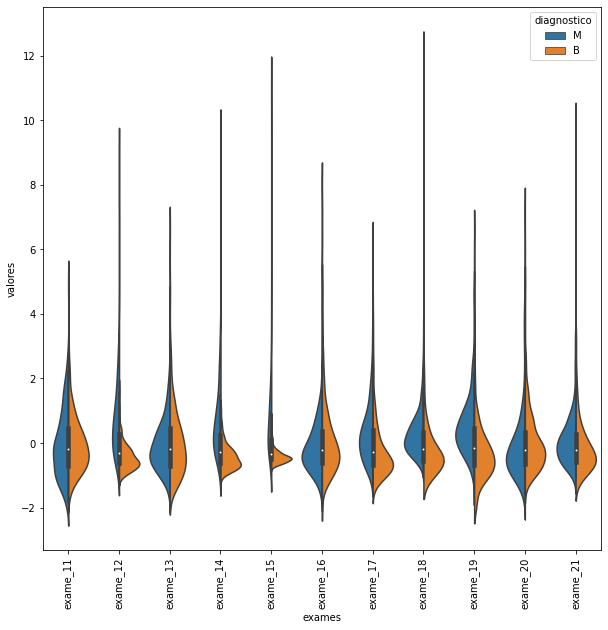

In [14]:
grafico_violino(valores_exames_v2, 10, 21)

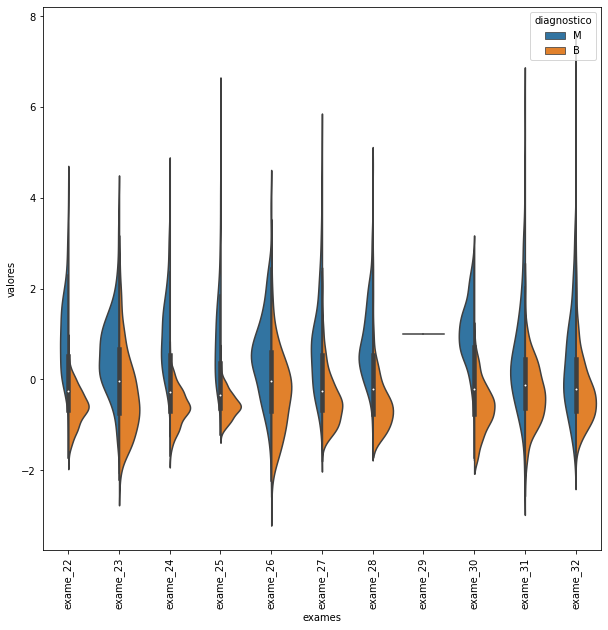

In [15]:
grafico_violino(valores_exames_v2, 21, 32)

In [16]:
valores_exames_v3 = valores_exames_v2.drop(columns=['exame_29', 'exame_4'])

In [17]:
def classificar(valores):
  X_train, X_test, y_train, y_test = train_test_split(valores, 
                                                    diagnostico, 
                                                    test_size=0.3,
                                                    random_state = 1234)
  classificador = RandomForestClassifier()
  classificador.fit(X_train, y_train)
  print("Validation Accuracy - Random Forest Classifier: {:.2f}%".format(classificador.score(X_test, y_test)*100))

In [18]:
classificar(valores_exames_v3)

Validation Accuracy - Random Forest Classifier: 92.98%


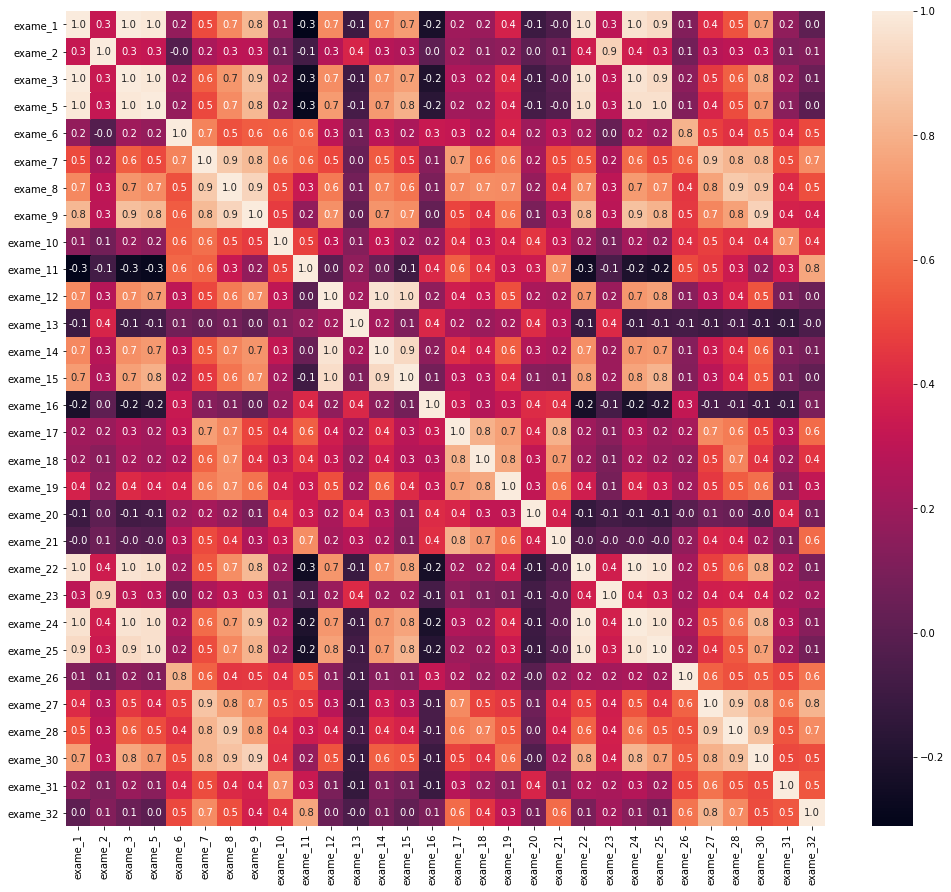

In [19]:
matriz_correlacao = valores_exames_v3.corr()
plt.figure(figsize=(17,15))
sns.heatmap(matriz_correlacao, annot=True, fmt = ".1f")

In [20]:
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao>0.99]
matriz_correlacao_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
matriz_correlacao_v2 = matriz_correlacao_v1.sum()

In [22]:
matriz_correlacao_v2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [23]:
variaveis_correlacionadas = matriz_correlacao_v2[matriz_correlacao_v2>1]
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [24]:
valores_exames_v4 = valores_exames_v3.drop(columns=variaveis_correlacionadas.keys())

In [25]:
valores_exames_v4.head()

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [26]:
classificar(valores_exames_v4)

Validation Accuracy - Random Forest Classifier: 93.57%


In [27]:
valores_exames_v5 = valores_exames_v3.drop(columns=['exame_3','exame_24'])
classificar(valores_exames_v5)

Validation Accuracy - Random Forest Classifier: 92.40%


# Aula 04

In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selecionar_kmelhores = SelectKBest(chi2, k = 5)

In [29]:
selecionar_kmelhores

SelectKBest(k=5, score_func=<function chi2 at 0x7f0593dd1200>)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(valores_exames_v5, 
                                                    diagnostico, 
                                                    test_size=0.3,
                                                    random_state = 1234)
selecionar_kmelhores.fit(X_train, y_train)

ValueError: ignored

In [31]:
valores_exames_v6 = valores_exames_v1.drop(columns=(['exame_4', 'exame_29', 'exame_3','exame_24']))

In [32]:
X_train, X_test, y_train, y_test = train_test_split(valores_exames_v6, 
                                                    diagnostico, 
                                                    test_size=0.3,
                                                    random_state = 1234)
selecionar_kmelhores.fit(X_train, y_train)
treino_kbest = selecionar_kmelhores.transform(X_train)
teste_kbest = selecionar_kmelhores.transform(X_test)

In [33]:
treino_kbest.shape

(398, 5)

In [34]:
teste_kbest.shape

(171, 5)

In [35]:
classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_kbest, y_train)
print("Validation Accuracy - Random Forest Classifier: {:.2f}%".format(
    classificador.score(teste_kbest, y_test)*100))

Validation Accuracy - Random Forest Classifier: 92.40%


In [36]:
y_pred = classificador.predict(teste_kbest)

In [37]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(y_test, y_pred)
matriz_confusao

array([[100,   5],
       [  8,  58]])

[Text(20.5, 0.5, 'Real'), Text(0.5, 2.5, 'Predição')]

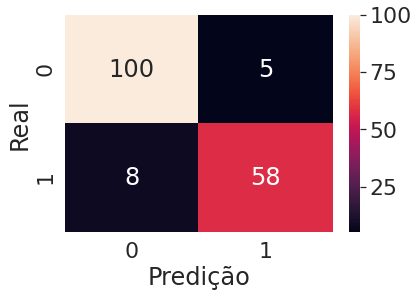

In [38]:
plt.figure(figsize=(6,4))
sns.set(font_scale=2)
sns.heatmap(matriz_confusao, annot=True, fmt = "d").set(xlabel = "Predição", ylabel="Real")

## Seleção com RFE

Validation Accuracy - Random Forest Classifier: 87.13%


[Text(20.5, 0.5, 'Real'), Text(0.5, 2.5, 'Predição')]

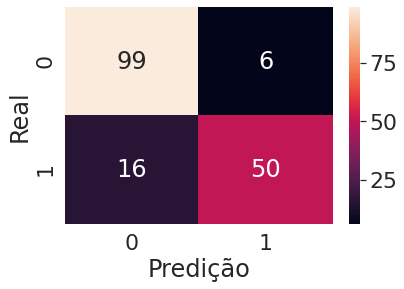

In [49]:
from sklearn.feature_selection import RFE

SEED = 1234
random.seed(SEED)

X_train, X_test, y_train, y_test = train_test_split(valores_exames_v6,
                                                    diagnostico,
                                                    test_size=0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(X_train, y_train)
selecionador_rfe = RFE(estimator = classificador, n_features_to_select=2, step=1)
selecionador_rfe.fit(X_train, y_train)
treino_rfe = selecionador_rfe.transform(X_train)
teste_rfe = selecionador_rfe.transform(X_test)
classificador.fit(treino_rfe, y_train)

print("Validation Accuracy - Random Forest Classifier: {:.2f}%".format(
    classificador.score(teste_rfe, y_test)*100))

y_pred = classificador.predict(teste_rfe)

matriz_confusao = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.set(font_scale=2)
sns.heatmap(matriz_confusao, annot=True, fmt = "d").set(xlabel = "Predição", ylabel="Real")

# Aula 05

## Seleção com RFECV

Validation Accuracy - Random Forest Classifier: 92.98%


[Text(20.5, 0.5, 'Real'), Text(0.5, 2.5, 'Predição')]

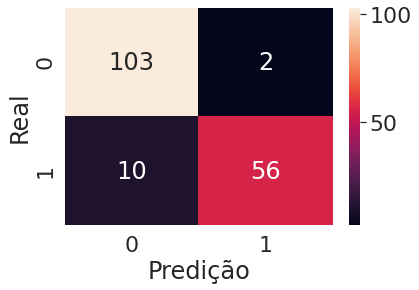

In [41]:
from sklearn.feature_selection import RFECV

SEED = 1234
random.seed(SEED)

X_train, X_test, y_train, y_test = train_test_split(valores_exames_v6,
                                                    diagnostico,
                                                    test_size=0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(X_train, y_train)
selecionador_rfecv = RFECV(estimator = classificador, cv=5, step=1, scoring="accuracy")
selecionador_rfecv.fit(X_train, y_train)
treino_rfecv = selecionador_rfecv.transform(X_train)
teste_rfecv = selecionador_rfecv.transform(X_test)
classificador.fit(treino_rfecv, y_train)

print("Validation Accuracy - Random Forest Classifier: {:.2f}%".format(
    classificador.score(teste_rfecv, y_test)*100))

y_pred = classificador.predict(teste_rfecv)

matriz_confusao = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.set(font_scale=2)
sns.heatmap(matriz_confusao, annot=True, fmt = "d").set(xlabel = "Predição", ylabel="Real")

In [42]:
selecionador_rfecv.n_features_

26

In [45]:
X_train.columns[selecionador_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_10', 'exame_12', 'exame_13', 'exame_14', 'exame_15',
       'exame_16', 'exame_18', 'exame_19', 'exame_20', 'exame_21', 'exame_22',
       'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31', 'exame_32'],
      dtype='object')

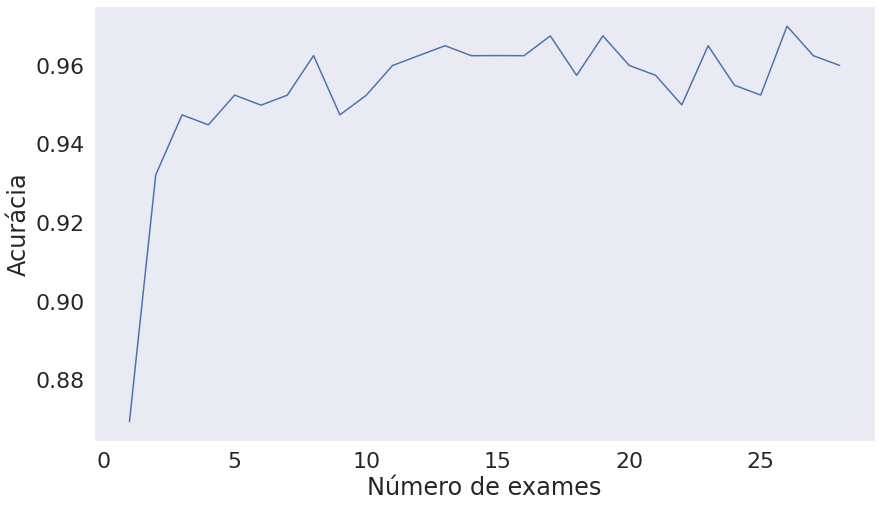

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
plt.xlabel("Número de exames")
plt.ylabel("Acurácia")
plt.grid()
plt.plot(range(1, len(selecionador_rfecv.grid_scores_)+1), selecionador_rfecv.grid_scores_)
plt.show()

In [50]:
valores_exames_v7 = selecionador_rfe.transform(valores_exames_v6)

In [51]:
valores_exames_v7.shape

(569, 2)

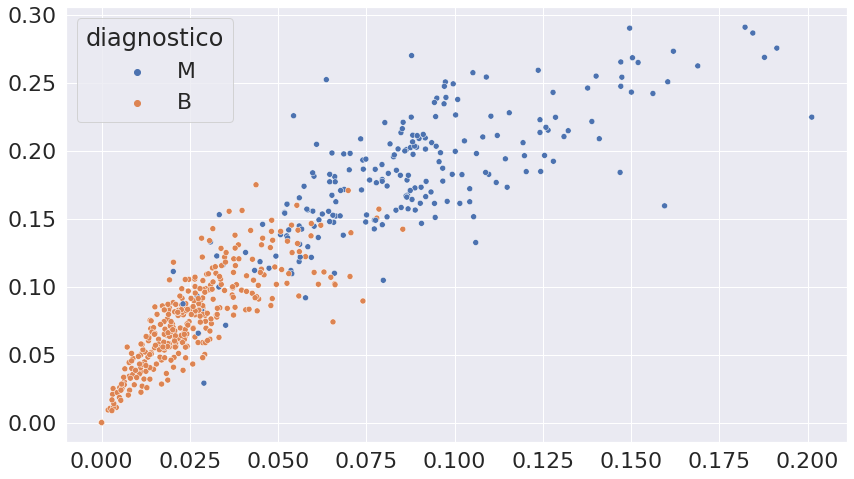

In [52]:
import seaborn as sns

plt.figure(figsize=(14,8))
sns.scatterplot(x=valores_exames_v7[:,0], y=valores_exames_v7[:,1], hue=diagnostico)

In [62]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

valores_exames_v8 = pca.fit_transform(valores_exames_v5)

In [63]:
valores_exames_v8

array([[ 8.96150504,  1.20129074],
       [ 1.44812702, -3.54148885],
       [ 5.24751143, -1.46792042],
       ...,
       [ 0.87829285, -1.93369918],
       [10.0242535 ,  0.84654838],
       [-5.04091294, -0.5352433 ]])

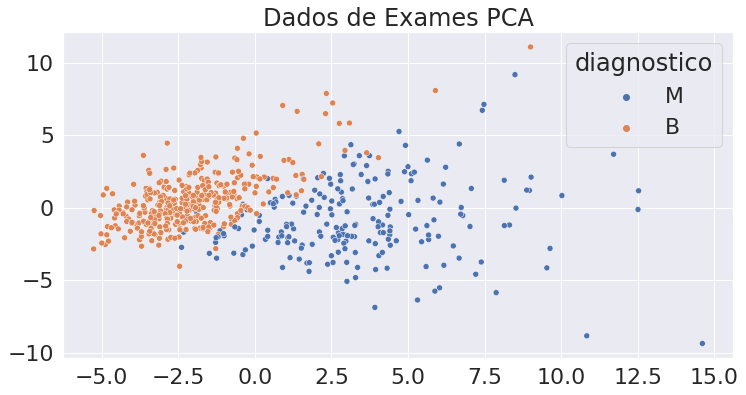

In [64]:
import seaborn as sns

plt.figure(figsize=(12,6))
plt.title("Dados de Exames PCA")
sns.scatterplot(x=valores_exames_v8[:,0], y=valores_exames_v8[:,1], hue=diagnostico)

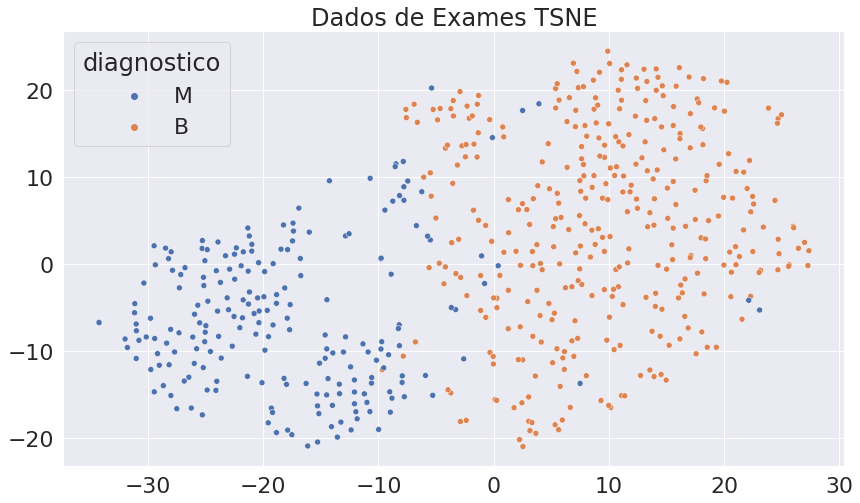

In [66]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)
valores_exames_v9 = tsne.fit_transform(valores_exames_v5)
plt.figure(figsize=(14,8))
plt.title("Dados de Exames TSNE")
sns.scatterplot(x=valores_exames_v9[:,0], y=valores_exames_v9[:,1], hue=diagnostico)